### SUCESSO DE ESTUDANTES

In [1]:
import pandas as pd
import numpy as np
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

%matplotlib inline

### IMPOTANDO BASE DE DADOS

In [2]:
estudantes = pd.read_csv("estudantes.csv", sep=";")
estudantes.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### EXPLORANDO DADOS

In [3]:
#informações dataset
estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
#número de linhas e coluans do dataframe
estudantes.shape

(4424, 37)

In [5]:
#presença de nulos
estudantes.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
# fig, ax = plt.subplots(1, sharey=True )
# heatmap = sns.heatmap(estudantes.select_dtypes(include="float64"), ax=ax)
# fig.set_size_inches(18.5, 10.5)


#### PREPROCESSAMENTO

In [7]:
# for i in range(37):
#     estudantes = estudantes.rename({estudantes.columns[i]:i}, axis=1)


    

In [8]:
labele = LabelEncoder()
estudantes["Target"] = labele.fit_transform(estudantes["Target"])
# for colunas in estudantes.iloc[:,:37].select_dtypes(include="object"):
#     estudantes.loc[colunas] = labele.fit_transform(estudantes.loc[colunas])

In [9]:
#Redimensioando com a Padronização
padronizar = StandardScaler()
estudantes.iloc[:,:36] = padronizar.fit_transform(estudantes.iloc[:,:36])
estudantes.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


In [10]:
#Separando entre clase e previsores
previsores = estudantes.iloc[:, 0:36].values
classe =estudantes.iloc[:, 36].values
classe

array([0, 2, 0, ..., 0, 2, 2])

In [11]:
X_train, X_test, y_train,y_test = train_test_split(previsores, classe, test_size=0.3, random_state=42)

##### CRIANDO MODELOS

In [12]:
n_estimators=500
learning_rate=0.01
subsample=1
max_depth=6
random_state=42

clf = [ GaussianNB(), 
    DecisionTreeClassifier(random_state=42),  
    RandomForestClassifier(
    n_estimators=500, 
    min_samples_leaf=25, random_state=42), 

    GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    subsample=subsample,
    max_depth=max_depth,
    random_state=random_state
)]
print(len(clf))

4


In [13]:
lista_clf=[]
for i in range(len(clf)):
    modelo = clf[i]
    modelo = modelo.fit(X_train, y_train)
    lista_clf.append(modelo)
    

In [14]:
lista_prev =[]
for item in lista_clf:
    previsao = item.predict(X_test)
    lista_prev.append(previsao)
    

In [15]:
lista_classificadores = ["Naive Bayes", "Árvore de Decisão","Floresta de Decisão", "XGBoost"]
contador=0
for item in lista_prev:
    acuracia = accuracy_score(y_test, item)
    mod = lista_classificadores[contador]
    print(f"{mod}: {round(acuracia,2)}")
    contador+=1

Naive Bayes: 0.69
Árvore de Decisão: 0.66
Floresta de Decisão: 0.74
XGBoost: 0.76


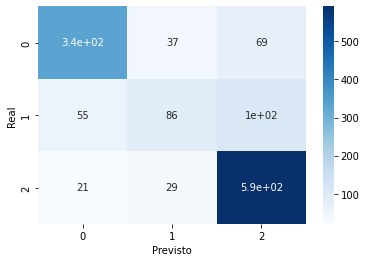

<Figure size 432x288 with 0 Axes>

In [16]:
#Opção com Saborn
confusao_matrix = confusion_matrix(y_test, lista_prev[3])
matriz= sns.heatmap(confusao_matrix, annot=True, cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.figure()

plt.show()
# plt.savefig("confusao.png")


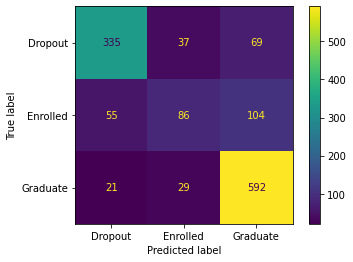

In [17]:
#Opção 2
categorias= ["Dropout", "Enrolled", "Graduate"]
confusao = ConfusionMatrixDisplay(confusao_matrix, display_labels=categorias)
confusao.plot()
#Salvando visualização
plt.savefig("MatrizConfusao.png")

#opção3 usando plot_confusion_matrix(modelo, teste, previsao)

In [18]:

mlflow.set_experiment("BestModel")
with mlflow.start_run():
    #logando métricas
    mlflow.log_metric("acuracia", acuracia)

    #logando parametros
    mlflow.log_param("n_estimators",n_estimators)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("subsample", subsample)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)

    #Imagemens
    mlflow.log_artifact("MatrizConfusao.png")
   

    #Modelo
    mlflow.sklearn.log_model(lista_clf[3],"XGBoost")
    print("Modelo: ",mlflow.active_run().info.run_uuid)


    mlflow.end_run()

Modelo:  ee131226072b47a89985c7c8224929c8


#### CRIANDO ESTRTURA EM CLASSE PARA BUSCAR NO XGBOOT UM BOM RESULTADO

In [43]:
class ModeloMl:
    def __init__(self, estimadores, aprendizado, random_state, max_depth):
        self._n_estimadores = estimadores
        self._learning_rate = aprendizado
        self._random_state=random_state
        #self._subsample = subsample
        self._max_depth = max_depth

    def procurar(self):
        mlflow.set_experiment("ProcuraBest")
        with mlflow.start_run():

            #cirando modelo
            modelo = GradientBoostingClassifier(n_estimators=self._n_estimadores,
            learning_rate=self._learning_rate,
            max_depth=self._max_depth,
            #subsample=self._subsample,
            random_state=self._random_state)

            modelo = modelo.fit(X_train, y_train)

            #criando artefatos gráficos
            previsao = modelo.predict(X_test)
            mc = confusion_matrix(y_test, previsao)
            labels_name = ["Dropout", "Enrolled", "Graduated"]
            matgraph = ConfusionMatrixDisplay(mc, display_labels=labels_name)
            matgraph.plot()
            plt.savefig("matgraph.png")

            #salvando parametros
            mlflow.log_param("n_estimators", self._n_estimadores)
            mlflow.log_param("learning_rate", self._learning_rate)
            mlflow.log_param("random_state", self._random_state)
            #mlflow.log_param("subsample", self._subsample)
            mlflow.log_param("maxdepth", self._max_depth)

            #fazendo metricas
            acuracia = accuracy_score(y_test, previsao)
            #precisoa acuracia e f1 não aceitam binary então precisa mudar para micro, macro,weighted ou sample
            precisao = precision_score(y_test, previsao, average="macro")
            recall = recall_score(y_test, previsao, average="macro")
            f1score = f1_score(y_test, previsao, average="macro")
            #salvando métricas
            mlflow.log_metric("acuracia",acuracia)
            mlflow.log_metric("precisao",precisao)
            mlflow.log_metric("recall",recall)
            mlflow.log_metric("f1_score",f1score)

            #salvando gráficos
            mlflow.log_artifact("matgraph.png")
            
            mlflow.sklearn.log_model(modelo, "XGBoost")
            print("Modelo", mlflow.active_run().info.run_uuid)
        mlflow.end_run()
    


#### ANALISANDO FEATURES IMPORTANTES

In [59]:
modelo_extra = ExtraTreeClassifier()
modelo_extra = modelo_extra.fit(X_train, y_train)

prevendo_extras = modelo_extra.predict(X_test)
modelo_extra.feature_importances_


array([0.0046268 , 0.02285907, 0.01905171, 0.03281245, 0.00865449,
       0.00618318, 0.02282307, 0.00473441, 0.02496005, 0.02600981,
       0.02958521, 0.02369758, 0.02937084, 0.01117108, 0.00230953,
       0.01130251, 0.0331755 , 0.01288504, 0.01615993, 0.02525548,
       0.00265967, 0.01054203, 0.02891799, 0.02340124, 0.20375504,
       0.02977156, 0.00570081, 0.00694279, 0.01733798, 0.0287931 ,
       0.16814972, 0.03791722, 0.00539649, 0.01955753, 0.0211975 ,
       0.02233161])

#### VARREDURA DE MELHORES MODELOS COM LAÇO

Modelo f6218d5cb1fd4308b6f7a66ff8592f33
Modelo 57f812bf1e664476a3f3eee7c749a335
Modelo 09e9ae820719457888965104f6253229
Modelo 835eb288256140b4bed24648775a6a62
Modelo e1b9a12d901444dfad696ef944149893
Modelo a7a25ea25b734ce4be711e8872408abb
Modelo def61052e23c43f5846de3a85338d9d8
Modelo e84e8db8c6eb4e0488512a38abd4a68f
Modelo abb764ba237647bc8040286841759e25
Modelo 3580d87467e746a5abae7b9d0fb0d679


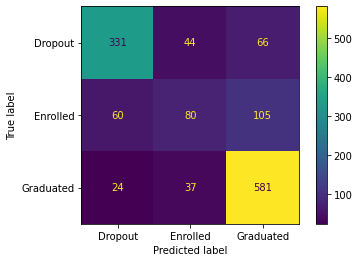

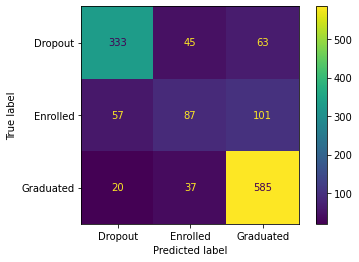

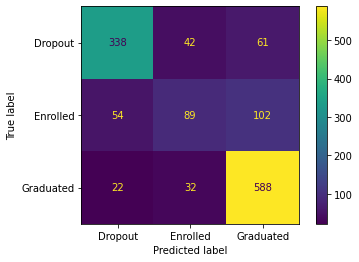

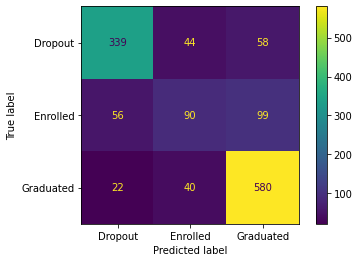

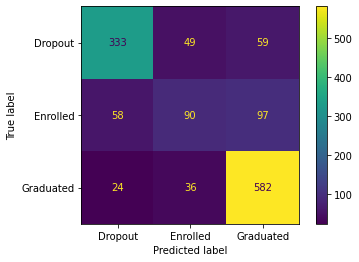

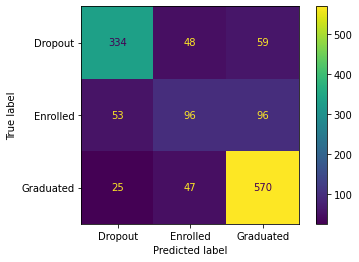

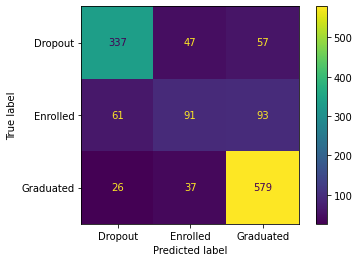

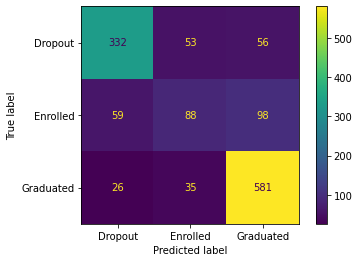

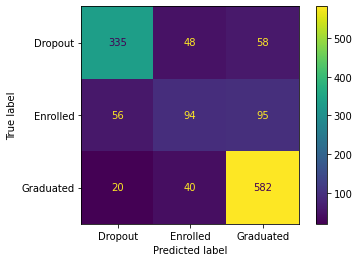

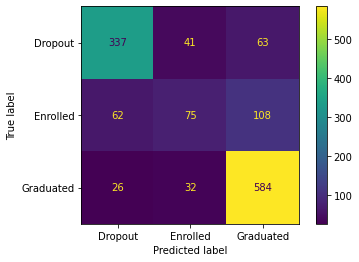

In [47]:
contador =1000
apr = 0.01
prf= 10
for elemento in range(10):
    mp = ModeloMl(1000,apr,42,prf)
    mp.procurar()
    apr+=0.01
    prf-=1

#### MELHOR MODELO ATÉ O MOMENTO

Modelo 823771f7eac7470fa80dbf6e0320f079


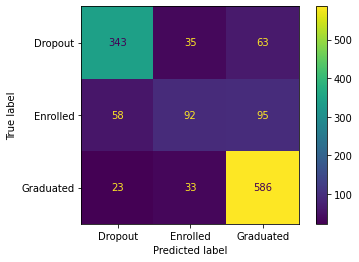

In [61]:
mp = ModeloMl(100,0.1,42,5)
mp.procurar()

##### use mlflow  ui --port 5000

DOCUMENTAÇÂO PRECISION: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html